In [1]:
import numpy as np
from numpy.linalg import solve, inv
import matplotlib.pyplot as plt
import sys
sys.path.append('..')
from Code.fixed_income_derivatives_E2024 import *
from scipy.optimize import minimize
from scipy.stats import norm, gamma

In [2]:
#1.a)
sigma = 0.08
r_tilde = 0.025
a_tilde = 1.5
b_tilde = 0.07
T = np.array([0.1, 0.25, 0.5, 0.75, 1, 1.5, 2, 3, 4, 5, 7, 10])
R = [0.0334, 0.0352, 0.0375, 0.0392, 0.0405, 0.0422, 0.0433, 0.0445, 0.0451, 0.0455, 0.0459, 0.0462]

def f(x):
    return fit_cir_no_sigma_obj(x, sigma, R, T)

x0 = r_tilde, a_tilde, b_tilde
res = minimize(f, x0, method='Nelder-Mead')
r_hat, a_hat, b_hat = res.x
print('r_hat:', r_hat)
print('a_hat:', a_hat)
print('b_hat:', b_hat)

r_hat: 0.03200620190760074
a_hat: 1.989704780287661
b_hat: 0.04701488926116818


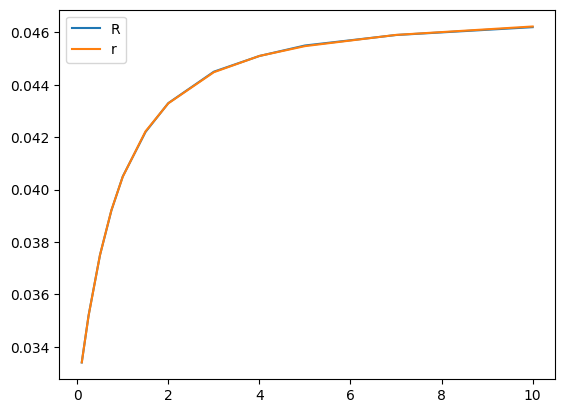

In [3]:
r = spot_rate_cir(r_hat, a_hat, b_hat, sigma, T)
plt.plot(T, R, label='R')
plt.plot(T, r, label='r')
plt.legend()
plt.show()

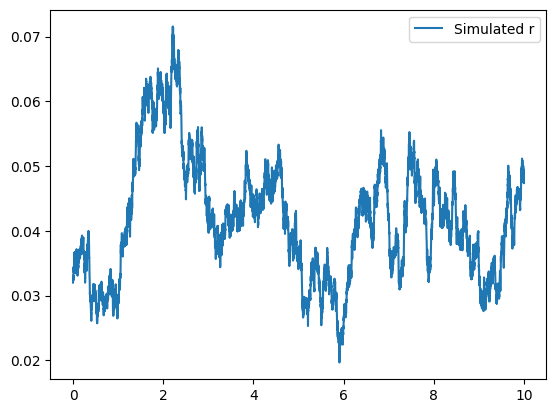

In [4]:
#1.b)
#i)
r0 = r_hat
a = a_hat
b = b_hat
sigma = 0.08
T_2_b = 10
M = 10000
delta = T_2_b/M
t_0 = 0
t = np.linspace(t_0, T_2_b, M+1)
r_simulated = simul_cir(r0, a, b, sigma, M, T_2_b, "euler")
plt.plot(t, r_simulated, label='Simulated r')
plt.legend()
plt.show()

In [5]:
#ii)
lower_bound, upper_bound = ci_cir(r0, a, b, sigma, 1, 0.99, "two_sided")
print('lower bound:', lower_bound)
print('upper bound:', upper_bound)

lower bound: 0.026483730552560578
upper bound: 0.069100828372531


In [6]:
#iii)
alpha = 2*a_hat*b_hat/sigma**2
beta = 2*a_hat/sigma**2
lower_bound = gamma.ppf(0.005, alpha, scale=1/beta)
upper_bound = gamma.ppf(0.995, alpha, scale=1/beta)
print('lower bound:', lower_bound)
print('upper bound:', upper_bound)

lower bound: 0.027632895995706588
upper bound: 0.07241624697898134


In [7]:
#1.c)
#i)
r0 = r_hat
a = a_hat
b = b_hat
sigma = 0.08
T_2_c = 2
M = 1000
delta = T_2_c/M
t_0 = 0
t = np.linspace(t_0, T_2_c, M+1)
N = 1000
X_simulated = np.zeros(N)
for i in range(N):
    r_simulated = simul_cir(r0, a, b, sigma, M, T_2_c, "euler")
    X_simulated[i] = np.exp(-T_2_c*np.mean(r_simulated))*np.max(r_simulated)
fair_value_X = np.mean(X_simulated)
print("Fair value of X:", fair_value_X)

Fair value of X: 0.054246232741929606


In [8]:
#ii)


In [9]:
#2.a)
EURIBOR_fixing = [
{"id": 0,"instrument": "libor","maturity": 1/2, "rate":0.02927}]
fra_market = [
{"id": 1,"instrument": "fra","exercise": 1/12,"maturity": 7/12, "rate":  0.03161},
{"id": 2,"instrument": "fra","exercise": 2/12,"maturity": 8/12, "rate":  0.03295},
{"id": 3,"instrument": "fra","exercise": 3/12,"maturity": 9/12, "rate":  0.03418},
{"id": 4,"instrument": "fra","exercise": 4/12,"maturity": 10/12, "rate": 0.03531},
{"id": 5,"instrument": "fra","exercise": 5/12,"maturity": 11/12, "rate": 0.03635},
{"id": 6,"instrument": "fra","exercise": 6/12,"maturity": 12/12, "rate": 0.03731},
{"id": 7,"instrument": "fra","exercise": 7/12,"maturity": 13/12, "rate": 0.03819},
{"id": 8,"instrument": "fra","exercise": 8/12,"maturity": 14/12, "rate": 0.03900},
{"id": 9,"instrument": "fra","exercise": 9/12,"maturity": 15/12, "rate": 0.03975}]
swap_market = [
{"id": 10,"instrument": "swap","maturity": 2, "rate":  0.03824, "float_freq": "semiannual", "fixed_freq": "semiannual","indices": []},
{"id": 11,"instrument": "swap","maturity": 3, "rate":  0.04083, "float_freq": "semiannual", "fixed_freq": "semiannual","indices": []},
{"id": 12,"instrument": "swap","maturity": 4, "rate":  0.04242, "float_freq": "semiannual", "fixed_freq": "semiannual","indices": []},
{"id": 13,"instrument": "swap","maturity": 5, "rate":  0.04346, "float_freq": "semiannual", "fixed_freq": "semiannual","indices": []},
{"id": 14,"instrument": "swap","maturity": 7, "rate":  0.04468, "float_freq": "semiannual", "fixed_freq": "semiannual","indices": []},
{"id": 15,"instrument": "swap","maturity": 10, "rate": 0.04561, "float_freq": "semiannual", "fixed_freq": "semiannual","indices": []},
{"id": 16,"instrument": "swap","maturity": 15, "rate": 0.04633, "float_freq": "semiannual", "fixed_freq": "semiannual","indices": []},
{"id": 17,"instrument": "swap","maturity": 20, "rate": 0.04667, "float_freq": "semiannual", "fixed_freq": "semiannual","indices": []},
{"id": 18,"instrument": "swap","maturity": 30, "rate": 0.04700, "float_freq": "semiannual", "fixed_freq": "semiannual","indices": []}]
data = EURIBOR_fixing + fra_market + swap_market
interpolation_options = {"method":"hermite","degree":2,"transition": "smooth"}
T_fit, R_fit = zcb_curve_fit(data,interpolation_options = interpolation_options)
T_6m = np.array([i*0.5 for i in range(0,61)])
p_inter, R_inter, f_inter, T_inter = zcb_curve_interpolate(T_6m,T_fit,R_fit,interpolation_options = interpolation_options)

In [10]:
#i)
T = np.array([0.5, 1, 3, 5, 10, 20, 30])
_, R_inter_i, _, _ = zcb_curve_interpolate(T,T_fit,R_fit,interpolation_options = interpolation_options)
print("R_inter_i:", R_inter_i)

R_inter_i: [0.02905788 0.03301207 0.04061185 0.04329832 0.04552815 0.04666068
 0.04703893]


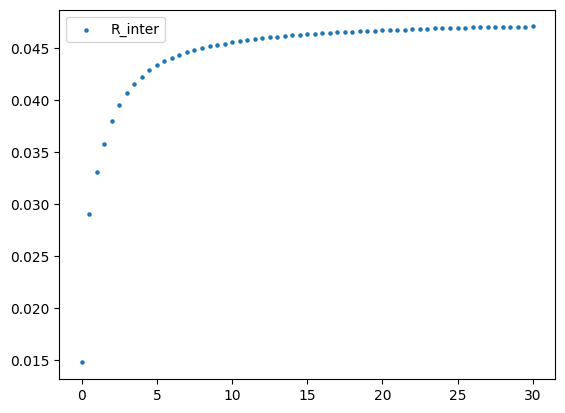

In [11]:
#ii)
plt.scatter(T_inter, R_inter, label='R_inter', s=5)
plt.legend()
plt.show()

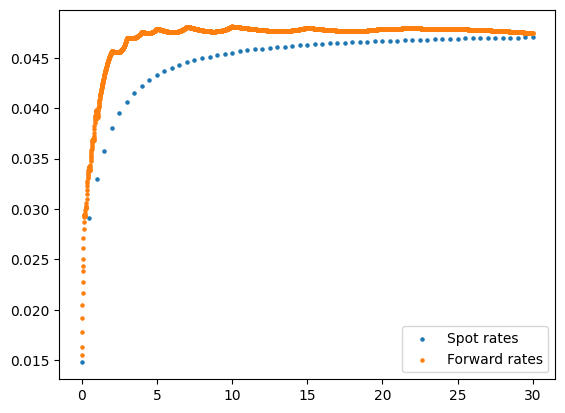

In [12]:
#2.b)
T_2_b = np.linspace(0, 30, 96*30)
p_inter_2_b, R_inter_2_b, f_inter_2_b, T_inter_2_b = zcb_curve_interpolate(T_2_b,T_fit,R_fit,interpolation_options = interpolation_options)
forward_rates = forward_rates_from_zcb_prices(T_inter_2_b, p_inter_2_b, horizon=0)
plt.scatter(T_inter, R_inter, label='Spot rates', s=5)
plt.scatter(T_inter_2_b, forward_rates, label='Forward rates', s = 5)
plt.legend()
plt.show()

In [13]:
#ii)
#The instantaneous forward rates should be continuous to prevent that interest rate derivatives
#with nearly the same maturity can have vastly different prices. Instantaneous forward rates
#will be continuous if and only if zero coupon bond prices are differentiable.

In [14]:
#iii)
#Whether zero coupon bond prices are differentiable depends on the method of interpolation
#and if for example a piecewise linear interpolation, or for that matter any other ’piecewise’
#method, is used, instantaneous forward rates will be discontinuous as in the above.

In [15]:
print(T_inter)

[ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5
  7.   7.5  8.   8.5  9.   9.5 10.  10.5 11.  11.5 12.  12.5 13.  13.5
 14.  14.5 15.  15.5 16.  16.5 17.  17.5 18.  18.5 19.  19.5 20.  20.5
 21.  21.5 22.  22.5 23.  23.5 24.  24.5 25.  25.5 26.  26.5 27.  27.5
 28.  28.5 29.  29.5 30. ]


In [16]:
#2.c)
#i)
fixed_leg_swap = 1/2*np.sum(p_inter[1:15])*0.04468
floating_leg_swap = (p_inter[0] -  p_inter[14])
price_now = floating_leg_swap - fixed_leg_swap
print('price now:', price_now)
spot_rates_bumped = R_inter.copy() + 0.0001
zcb_prices_bumped = zcb_prices_from_spot_rates(T_inter, spot_rates_bumped)
fixed_leg_swap_bumped = 1/2*np.sum(zcb_prices_bumped[1:15])*0.04468
floating_leg_swap_bumped = (zcb_prices_bumped[0] -  zcb_prices_bumped[14])
price_bumped = floating_leg_swap_bumped - fixed_leg_swap_bumped
print('price bumped:', price_bumped)
delta = (price_bumped - price_now)
print('delta:', delta)

price now: -2.760191512907184e-06
price bumped: 0.0006049300165911209
delta: 0.0006076902081040281


In [17]:
#ii)
T_2_c = np.array([1, 2, 3, 5, 7])
dv01 = np.zeros(len(T_2_c))
for i in range(len(T_2_c)):
    fixed_leg_swap = 1/2*np.sum(p_inter[1:15])*0.04468
    floating_leg_swap = (p_inter[0] -  p_inter[14])
    price_now = floating_leg_swap - fixed_leg_swap
    spot_rates_bumped = R_inter.copy()
    spot_rates_bumped[T_2_c[i]*2] += 0.0001
    zcb_prices_bumped = zcb_prices_from_spot_rates(T_inter, spot_rates_bumped)
    fixed_leg_swap_bumped = 1/2*np.sum(zcb_prices_bumped[1:15])*0.04468
    floating_leg_swap_bumped = (zcb_prices_bumped[0] -  zcb_prices_bumped[14])
    price_bumped = floating_leg_swap_bumped - fixed_leg_swap_bumped
    delta = (price_bumped - price_now)
    dv01[i] = delta
print('dv01:', dv01)

dv01: [2.16134698e-06 4.14060717e-06 5.93235017e-06 8.99339139e-06
 5.23700120e-04]


In [18]:
#iii)
#It is more sensitive to changes in the yield curve at the 
#back end of the curve

In [19]:
#3.a)
T = np.array([0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4])
R = np.array([0.0385, 0.0431, 0.0463, 0.0486, 0.0502, 0.0513, 0.0521, 0.0527])
sigma = np.array([0.223, 0.241, 0.260, 0.283, 0.312, 0.355, 0.402])
ZCB = zcb_prices_from_spot_rates(T, R)
libor_rates = forward_libor_rates_from_zcb_prices(T, ZCB, horizon=1)
print('Times:', T)
print('Libor rates:', libor_rates)

Times: [0.5 1.  1.5 2.  2.5 3.  3.5 4. ]
Libor rates: [0.         0.04827337 0.05340046 0.05627724 0.0574085  0.05761425
 0.05771713 0.05771713]


In [20]:
#3.b)
#i)
swap_rate, accrual_factor = swap_rate_from_zcb_prices(0, 0, 4, "semiannual", T, ZCB, "semiannual")
print('Swap rate:', swap_rate)
print('Accrual factor:', accrual_factor)

Swap rate: 0.05307796270952918
Accrual factor: 3.580845089117633


In [21]:
#ii)
strike = 0.05
d1 = (np.log(libor_rates[1:]/strike) + 1/2*sigma**2*(T[:-1] - 0))/(sigma*np.sqrt(T[:-1] - 0))
d2 = d1 - sigma*np.sqrt(T[:-1] - 0)
PV_caplet = []
for i in range(len(T[:-1])):
    PV_caplet.append(1/2*ZCB[i+1]*(libor_rates[i+1]*norm.cdf(d1[i]) - strike*norm.cdf(d2[i])))
print('Caplet price:', np.sum(PV_caplet))
PV_caplet = black_caplet_price(sigma=sigma, T=T[:-1], R=strike, alpha=0.5, p=ZCB[1:], L=libor_rates[1:], type="call")
print('Caplet price:', np.sum(PV_caplet))
print('Semiannual premium:', np.sum(PV_caplet)*1/2/accrual_factor)

Caplet price: 0.03612243247858449
Caplet price: 0.03612243247858449
Semiannual premium: 0.005043841827780035


In [22]:
#iii)
strike = 0.05
sigma = 0.39
A = np.sum(ZCB[4:])*1/2
swap_rate, accrual_factor2 = swap_rate_from_zcb_prices(0, 2, 4, "semiannual", T, ZCB, "semiannual")
print('Swap rate:', swap_rate)
print('Accrual factor:', accrual_factor2)
print('A:', A)
swaption_price = black_swaption_price(sigma=0.39, T=2, K=strike, S=A, R=swap_rate, type="call")
print('Swaption price:', swaption_price)
print('Semiannual premium:', swaption_price*1/2/accrual_factor)

Swap rate: 0.05761057785501258
Accrual factor: 1.691329592908512
A: 1.691329592908512
Swaption price: 0.02683993510220535
Semiannual premium: 0.003747709609635621


In [23]:
#3.c)
# i) Simply swapping the floating rate payments into a fixed stream of coupon payments eliminates
# all uncertainty. However, this choice also has no upside in the sense that if interest rates fall,
# the client will not benefit from future lower interest rate payments.
# ii) Entering into an interest rate cap starting right now will insure that the interest payments
# will never rise above 0.05 so this limits the downside to the client at all future points in time.
# Also, there is a potential for upside in that the investor will benefit from low future interest
# rates. The strategy however comes at the cost that the investor will have to pay the premium
# of roughly 50 bp twice a year regardless of whether the cap comes into effect or not.
# iii) Entering into a swaption with an exercise time in two years will insure that interest payments
# cannot exceed 0.05 from two years into the future and beyond. However, the client is not
# insured against rises in interest rates prior to the exercise time. This option is thus more risky
# than ii) and it therefore makes sense that it is less costly. This strategy like ii) has an upside
# in that the client will benefit from low future interest rates.

In [24]:
#4.a)
T = np.array([0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6])
ZCB = np.array([0.98322948, 0.96455878, 0.94449414, 0.92344747, 0.90175113, 
                0.87967118, 0.85741902, 0.83516131, 0.81302835, 0.79112104, 
                0.76951663, 0.7482734])
K_offset = np.array([-300, -250, -200, -150, -100, -50, 0,
                     50, 100, 150, 200, 250, 300])
pi_swaption = np.array([0.0995524, 0.08350629, 0.06774531, 0.05248227, 
                        0.03808218, 0.02519355, 0.01482874, 0.00785645, 
                        0.00404525, 0.00219232, 0.00128815, 0.00081635, 
                        0.00054773])
forward_rate = (np.log(ZCB[3]/ZCB[-1])/4)
forward_rate = (ZCB[3] - ZCB[-1])/ZCB[-1]/4
swap_rate, accrual_factor = swap_rate_from_zcb_prices(0, 2, 6, "semiannual", T, ZCB, "semiannual")
K = swap_rate + K_offset/10000
print(forward_rate)

0.058526091532854194


In [25]:
#i)
print('Swap rate:', swap_rate)
print('Accrual factor:', accrual_factor)

Swap rate: 0.053115709145571254
Accrual factor: 3.2979710300000002


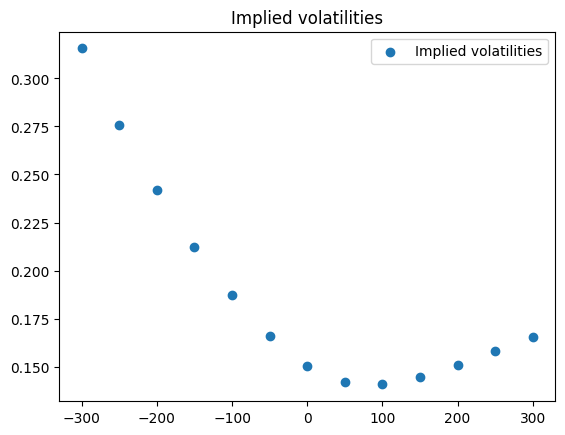

In [26]:
#ii)
iv_swaptions = []
for i in range(len(K)):
    iv_swaptions.append(black_swaption_iv(C=pi_swaption[i], T=2, K=K[i], S=accrual_factor, R=swap_rate, type="call", max_iter=1000))
plt.scatter(K_offset, iv_swaptions, label='Implied volatilities')
plt.legend()
plt.title('Implied volatilities')
plt.show()

In [27]:
#iii)
# here is in a ’smirk’ in implied volatilities clearly indicating that market prices are not equiv-
# alent to what would arise in a Black’s model. The pricing measure chosen by the market is
# not compatible with the 2Y 4Y forward par swap rate following a log-normal distribution. The
# distribution implied by the measure chosen by the market has more fat tails and displays more
# left skewness than that of a log-normal random variable. This is a finding that is very much
# consistent with typical market behavior.

In [36]:
#4.b)
#i)
sigma_bar = 0.04
beta_bar = 0.5
v_bar = 0.4
rho_bar = -0.3
params_0 = sigma_bar, beta_bar, v_bar, rho_bar
def f(x):
    y = fit_sabr_obj(param=x, sigma_market=iv_swaptions, K=K, T=2, R=swap_rate)
    return y
res = minimize(f, params_0, method="nelder-mead")
sigma_res, beta_res, v_res, rho_res = res.x
print("Sigma: ", sigma_res)
print("Beta: ", beta_res)
print("v: ", v_res)
print("Rho: ", rho_res)

Sigma:  0.05923640988046269
Beta:  0.6956862772416512
v:  0.5995892401038199
Rho:  -0.34873884784928766


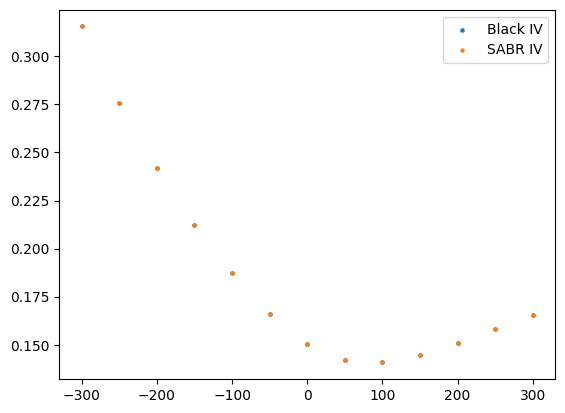

In [41]:
#ii)
iv_simulated = []
for i in range(len(K)):
    iv_simulated.append(sigma_sabr(K[i],2,swap_rate,sigma_res,beta_res,v_res,rho_res))
plt.scatter(K_offset, iv_swaptions, s=5, label="Black IV")
plt.scatter(K_offset, iv_simulated, s=5, label="SABR IV")
plt.legend()
plt.show()

In [42]:
#4.c)
#i)
price_now = pi_swaption[4]
v_bumped = v_res - 0.02
sigma_bumped = sigma_sabr(K[4], 2, swap_rate, sigma_res, beta_res, v_bumped, rho_res)
price_bumped = black_swaption_price(sigma=sigma_bumped, T=2, K=K[4], S=accrual_factor, R=swap_rate, type="call")
delta = price_bumped - price_now
print('Delta:', delta)

Delta: -0.0001169425327160814


In [43]:
#ii)
rho_bumped = rho_res + 0.1
sigma_bumped = sigma_sabr(K[4], 2, swap_rate, sigma_res, beta_res, v_res, rho_bumped)
price_bumped = black_swaption_price(sigma=sigma_bumped, T=2, K=K[4], S=accrual_factor, R=swap_rate, type="call")
delta = price_bumped - price_now
print('Delta:', delta)

Delta: -0.00020041271941131228


In [54]:
#iii)
spot_rates = spot_rates_from_zcb_prices(T, ZCB)
spot_rates_bumped = spot_rates.copy() - 0.0001
ZCB_bumped = zcb_prices_from_spot_rates(T, spot_rates_bumped)
swap_rate_bumped, accrual_factor_bumped = swap_rate_from_zcb_prices(0, 2, 6, "semiannual", T, ZCB_bumped, "semiannual")
K_bumped = swap_rate_bumped + K_offset/10000
K_bumped = K.copy()
sigma_bumped = sigma_sabr(K_bumped[4], 2, swap_rate_bumped, sigma_res, beta_res, v_res, rho_res)
price_bumped = black_swaption_price(sigma=sigma_bumped, T=2, K=K_bumped[4], S=accrual_factor_bumped, R=swap_rate_bumped, type="call")
delta = price_bumped - price_now
print('Delta:', delta)

Delta: -0.0002839878902577489
